# import helpful libraries

In [1]:
# numpy, pandas, matplot 임포트

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplot의 스타일과 폰트사이즈 지정

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# missingno는 null값을 쉽게 보여줄 수 있는 라이브러리 

import missingno as msno

# 경고 무시하도록 설정

import warnings
warnings.filterwarnings('ignore')

# matplotlib는 설정을 기본적으로 새로운 창으로 나오는데, 
# inline설정은 해주면 해당 노트북에 출력하기 위한 설정.

%matplotlib inline

# data set check

In [2]:
# data 로드

df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
# 데이터 앞부분을 볼 수 있는 head()메서드의 default값은 5

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 데이터 앞부분을 볼 수 있는 head()메서드의 default값은 5

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# pandas 데이터 프레임에는 describe 매서드가 있다. 
# train 데이터의 대략적인 수치들을 보여준다.

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# train 데이터의 차원 확인

df_train.shape

(891, 12)

In [7]:
# pandas 데이터 프레임에는 describe 매서드가 있다. 
# test 데이터의 대략적인 수치들을 보여준다.

df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# test 데이터의 차원 확인

df_test.shape

(418, 11)

In [9]:
# train data 각 열에 null데이터가 몇 개있는지 확인하고 퍼센트로 확인

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
# test data 각 열에 null데이터가 몇 개있는지 확인하고 퍼센트로 확인

for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

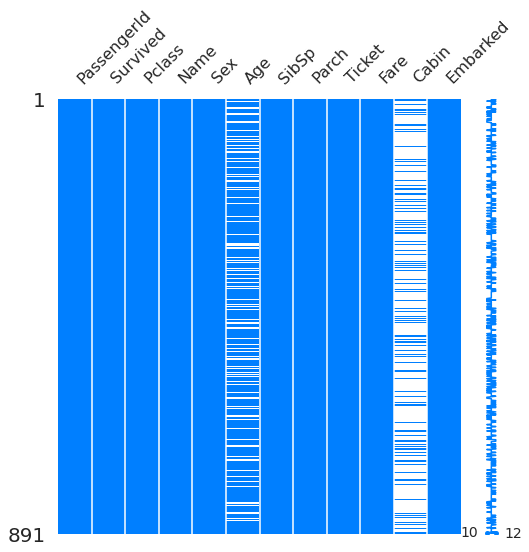

In [11]:
# train data의 null 위치 분포를 볼 수 있다.
# missingno 라는 라이브러리를 이용해서 input에 data frame을 넘겨주고,
# matrix 형태를 만들어 주는데, 
# index location 이라는 iloc를 이용해서 원하는 위치에 있는 컬럼을 가져와서 사용할 수 있다.
# figsize는 그래프 크기이고, color는 rgb로 이루어져 있다.

msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color = (0, 0.5, 1))

<AxesSubplot:>

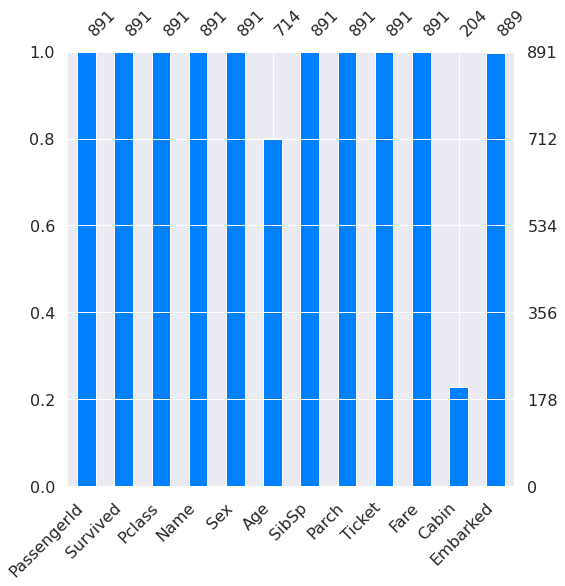

In [12]:
# train data의 null의 퍼센트를 볼 수 있다.
# missingno 라는 라이브러리를 이용해서 input에 data frame을 넘겨주고,
# 아래와 같은 bar 형태를 만들어 준다.
# index location 이라는 iloc를 이용해서 원하는 위치에 있는 컬럼을 가져와서 사용할 수 있다.
# figsize는 그래프 크기이고, color는 rgb로 이루어져 있다.

msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color = (0, 0.5, 1))

<AxesSubplot:>

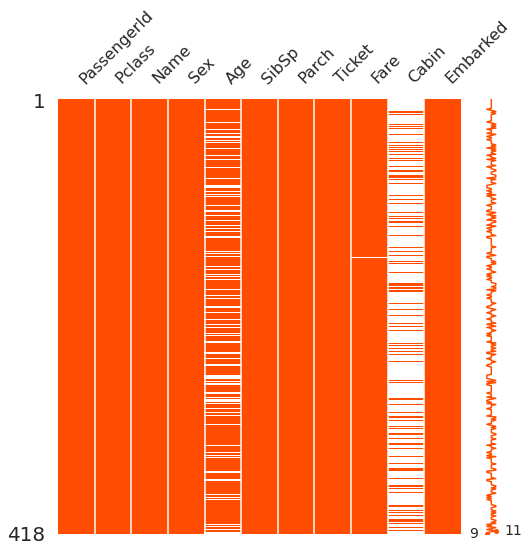

In [13]:
# test data의 null 위치 분포 확인

# missingno 라는 라이브러리를 이용해서 input에 data frame을 넘겨주고,
# matrix 형태를 만들어 주는데, 
# index location 이라는 iloc를 이용해서 원하는 위치에 있는 컬럼을 가져와서 사용할 수 있다.
# figsize는 그래프 크기이고, color는 rgb로 이루어져 있다.

msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color = (1, 0.3, 0))

<AxesSubplot:>

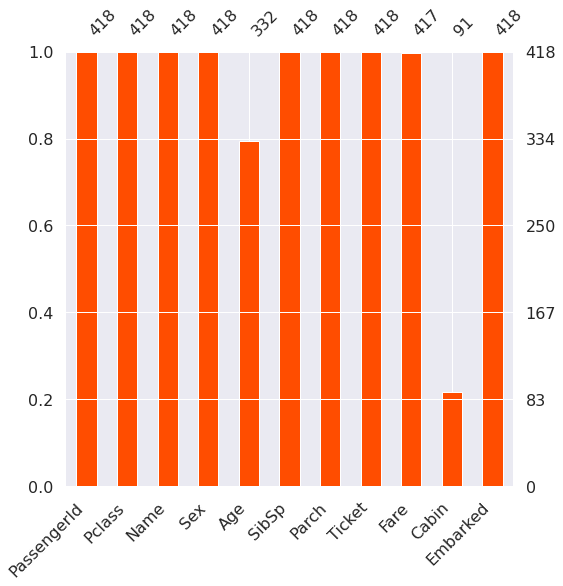

In [14]:
# test data의 null의 퍼센트 확인

# missingno 라는 라이브러리를 이용해서 input에 data frame을 넘겨주고,
# 아래와 같은 bar 형태를 만들어 준다.
# index location 이라는 iloc를 이용해서 원하는 위치에 있는 컬럼을 가져와서 사용할 수 있다.
# figsize는 그래프 크기이고, color는 rgb로 이루어져 있다.

msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color = (1, 0.3, 0))

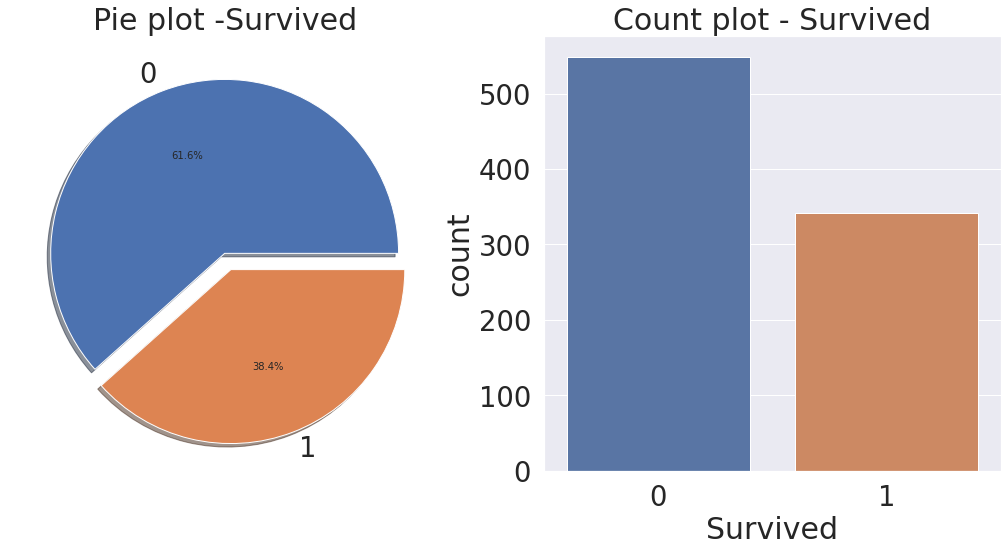

In [15]:
# 파이플랏에 서브플랏으로 row 1, column2 즉 1행 2열로 된 파레트를 총 가로 18 세로 8 크기로 만듬

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# eplode는 pie를 중심에서 얼만 큼 떨어트릴것이냐.
# autopct='%1.1f%%'는 퍼센트형식을 나타냄
# ax=ax[0]는 ax[0,1]중에 0에다 그린다는 뜻

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot -Survived')
ax[0].set_ylabel('')

# seaborn의 카운트플랏의 인풋으로 'Survived' 라는 이름을 가진 column을 준다.
# 그리고 데이터는 df_train을 사용하겠다.
# 그리고 ax=ax[1]이용해서 도화지의 두번째부분에다 그리겠다는 뜻

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

# EDA(Exploratory Data Analysis)

### 2.1 Pclass column (Ordinal data 순서가있는 카테고리 서수형 데이터)

In [16]:
# Pclass 컬럼과 서바이벌 컬럼 비교. 이때 리스트로 가져와야함

df_train[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [17]:
# 그룹바이로 묶어줄 것인데,

df_train[['Pclass', 'Survived']].groupby

<bound method DataFrame.groupby of      Pclass  Survived
0         3         0
1         1         1
2         3         1
3         1         1
4         3         0
..      ...       ...
886       2         0
887       1         1
888       3         0
889       1         1
890       3         0

[891 rows x 2 columns]>

In [18]:
# Pclass로 묶을래
# data frame groupby 객체가 하나 생성됌

df_train[['Pclass', 'Survived']].groupby(['Pclass'])

In [19]:
# 그룹바이 객체는 수많은 매서드를 가지고 있다.
# sum 매서드은 Pclass 1, 2, 3각각에 해당하는 Survived 샘플을 모두 더한것이다.

df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
# Survived 열이 무슨 객체들로 이루어져있는지 확인해보면
# 0과 1로 이루어져있음을 알 수 있고,
# 위에 136, 87, 119는 
# Pclass n에 해당하는 Survived의 샘플들 0과 1을 모두 더했더니 각각 136, 87, 119라는 뜻

df_train['Survived'].unique()

array([0, 1])

In [21]:
# 클래스 샘플이 몇개나 존재하는지

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# 종합적으로 그린 표
# margins=True 는 All을 표시한다는 뜻.

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [23]:
# .style.background_gradient(cmap='summer_r') 를 이용해서 가독성 좋게 'symmer_r'색상을 적용
# 더 많은 색상은 color map scheme 를 검색해서 찾아보면 된다!

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

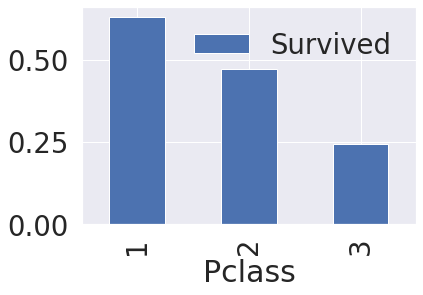

In [24]:
# 이 데이터셋에서는 클래스별로 평균을 구하면 -> 생존률 이 된다.
# as_index는 Pclass를 인덱스로 둘 것인지 결정하는 것이다.
# 만약 False로 두면 시리즈가 2개가되기 떄문에 plot을 2개로 하기 때문에
# 이 문제에서는 index를 True로 설정해서 시리즈 1개로 설정하고 plot해야한다.
# mean()로 평균을 구하면 Pclass와 Survived 묶음이기때문에 생존률이 됌.
# ascending은 True로하면 오름차순 정렬, False는 내림차순 정렬
# type을 찍어보면 data frame이기때문에 plot을 가지고 볼 수 있음
# 더 잘보기 위해 plot.bar()를 해주었음

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

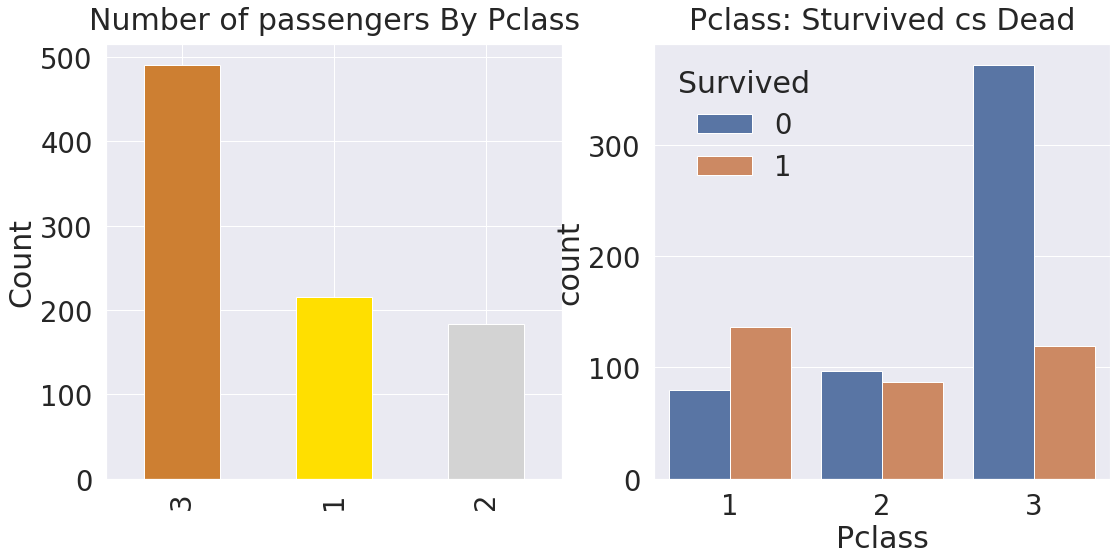

In [25]:
# 왼쪽은 count그래프를 그렸다.
# 오른쪽은 생존과 피클래스까지 다 합쳐서 볼 수 있도록 그렸다.
# 이때 hue는 색깔을 서바이벌에 색깔을 지정해서 한 plot으로 나타내 준 것이다. 
# 색을 하나 지정해주면 색깔을 나눠서 표시해준다.

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Sturvived cs Dead', y=y_position)
plt.show()

### 2.2 Sex (성별)

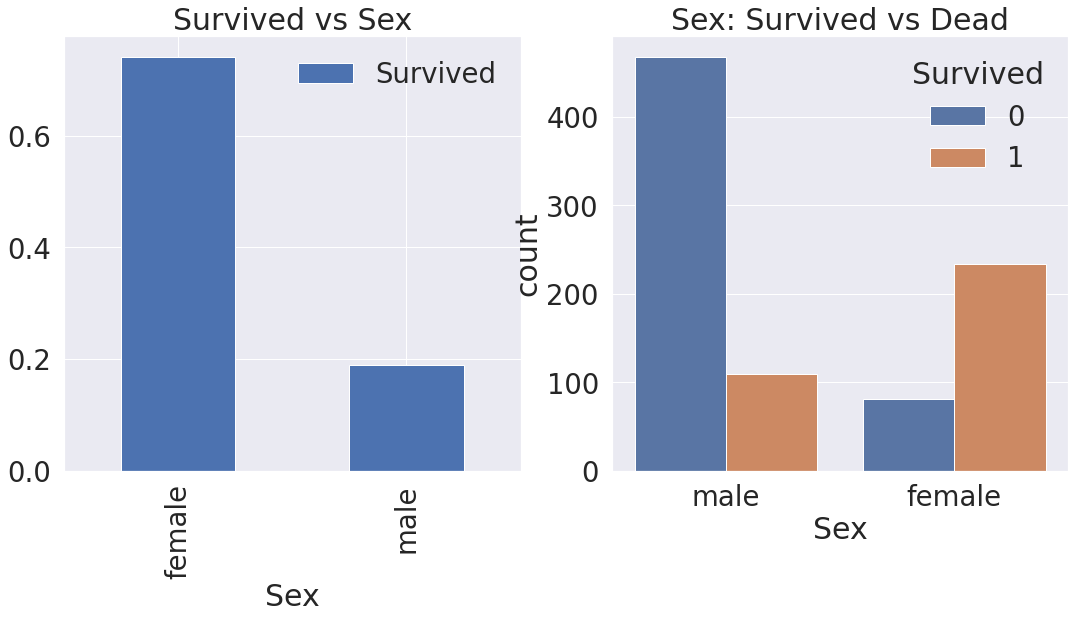

In [26]:
# 왼쪽은 count그래프를 그렸다.
# 오른쪽은 생존과 Sex까지 다 합쳐서 볼 수 있도록 그렸다.
# 이때 hue는 색깔을 서바이벌에 색깔을 지정해서 한 plot으로 나타내 준 것이다.
# 색을 하나 지정해주면 색깔을 나눠서 표시해준다.
# index = True로 하면 sex가 컬럼으로 들어간다

f, ax = plt.subplots(1, 2, figsize=(18 ,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [27]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.3 Both Pclass and Sex

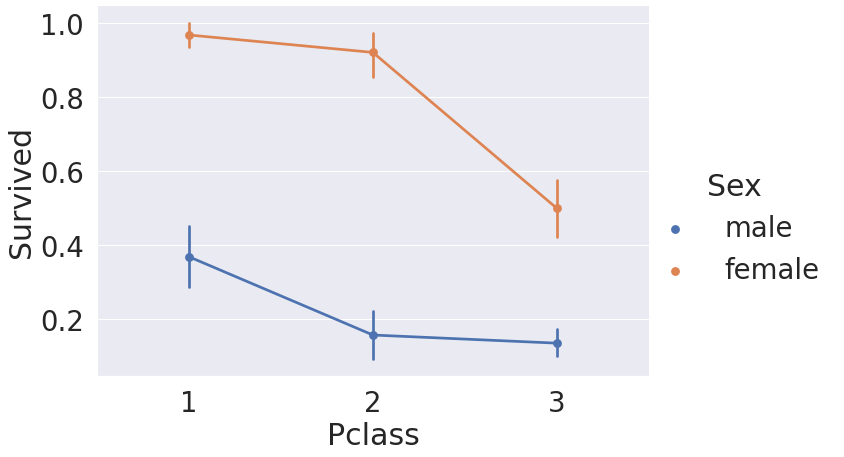

In [29]:
# factorplot
# X축은 Pclass, Y축은 Survived, 

sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

-Lady first.
-Money brings survival?

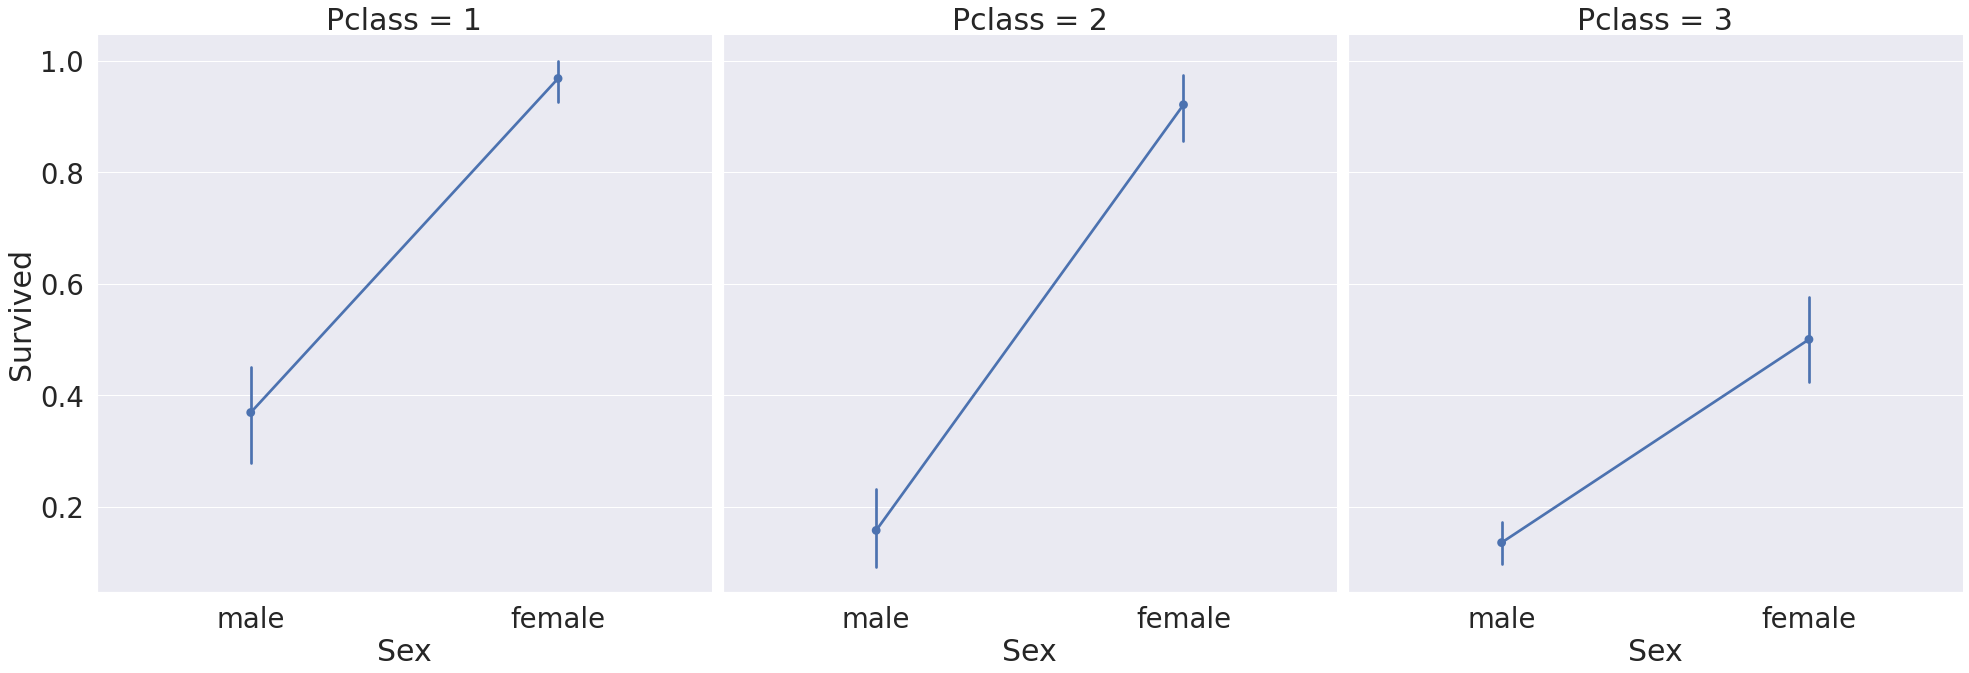

In [30]:
# x, y, col

sns.factorplot(x="Sex", y='Survived', col="Pclass", data=df_train, saturation=5, size = 9, aspect = 1)

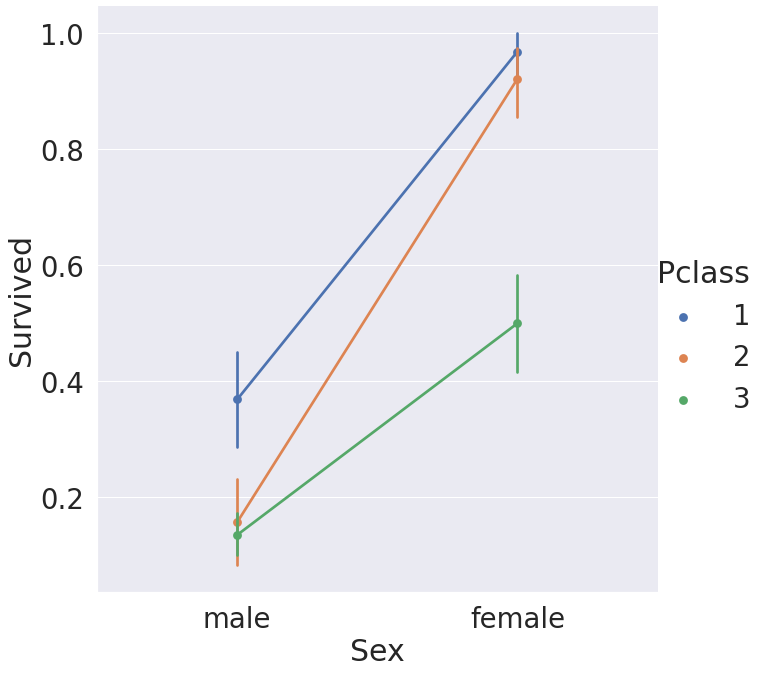

In [31]:
# x, y, hue
# 선 양끝에 직선은 error bar라고 하는데 이 수치가 얼마나 믿을 수 있는가 를 나타내는 지표라고 보면된다.
# 에러바가 짧으면 긴것보다 더 신뢰할 수 있음. 

sns.factorplot(x="Sex", y='Survived', hue="Pclass", data=df_train, saturation=5, size = 9, aspect = 1)

### Age

In [32]:
# df_train 에서 각종 조건의 탑승객 나이 확인

print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


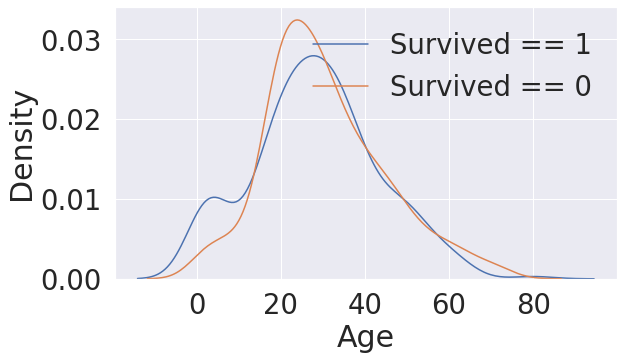

In [33]:
# kdeplot 을 구글링해보자.
# kernel density estimate plot이다.
# 히스토그램으로 그린 것을 커널밀도함수를 이용해서 스무스하게 표현.

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']== 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']== 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

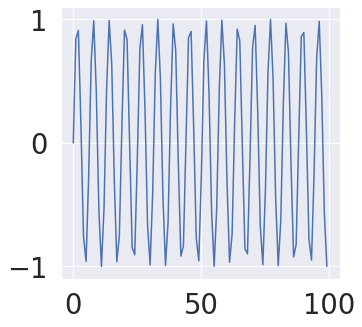

In [34]:
# 번외
# 도화지를 준비하는 세가지 방법 소개
# 세 가지 문법 모두 알면 좋음

# 1
# f = plt.figure(figsize=(5, 5))
# 2
# f, ax = plt.subplots(1, 1, figsize=(5, 5))
# 3
plt.figure(figsize = (5, 5))

a = np.arange(100)
b = np.sin(a)

# 1
# plt.plot(b)
# 2
# ax.plot(b)
# 3
plt.plot(b)

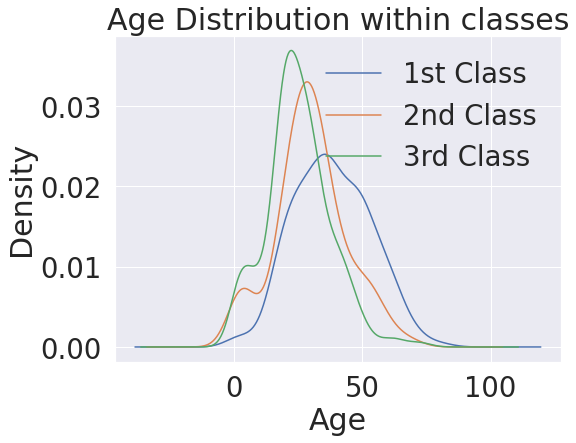

In [35]:
# 다시 본론으로
# 클래스별로 나이 분포를 확인

plt.figure(figsize=(8, 6))
# hist를 쓰면 겹치면 안보인다.
# df_train['Age'][df_train['Pclass'] == 1].plot(kind ='hist')
# df_train['Age'][df_train['Pclass'] == 2].plot(kind ='hist')
# df_train['Age'][df_train['Pclass'] == 3].plot(kind ='hist')
df_train['Age'][df_train['Pclass'] == 1].plot(kind ='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind ='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind ='kde')

plt.xlabel('Age')
plt.title("Age Distribution within classes")
plt.legend(['1st Class', '2nd Class', '3rd Class'])


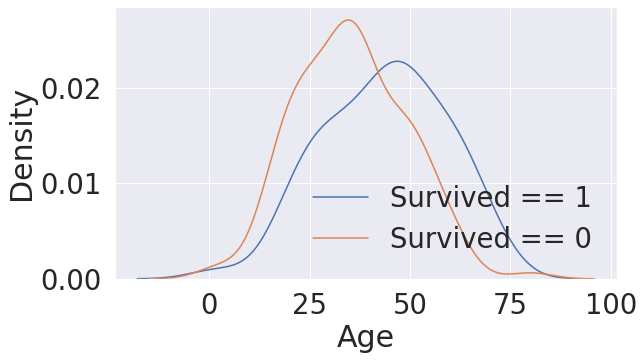

In [36]:
# 클래스 1의 생존분포
# &(불린)을 사용해서
# 생존하지 않은 사람인데 pclass가 1인것
# 생존한사람인데 Pclass가 1인것

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived']== 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived']== 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

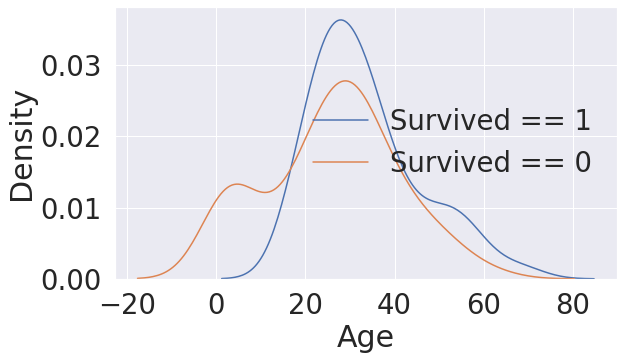

In [37]:
# 클래스 2의 생존분포
# &(불린)을 사용해서
# 생존하지 않은 사람인데 pclass가 2인것f
# 생존한사람인데 Pclass가 2인것

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived']== 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived']== 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

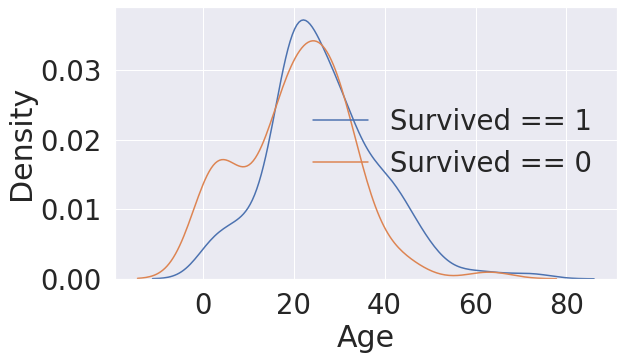

In [38]:
# 클래스 3의 생존분포
# &(불린)을 사용해서
# 생존하지 않은 사람인데 pclass가 3인것
# 생존한사람인데 Pclass가 3인것

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived']== 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived']== 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [39]:
# 10살은 총 몇명이고 그중 몇명 살았는지 

i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

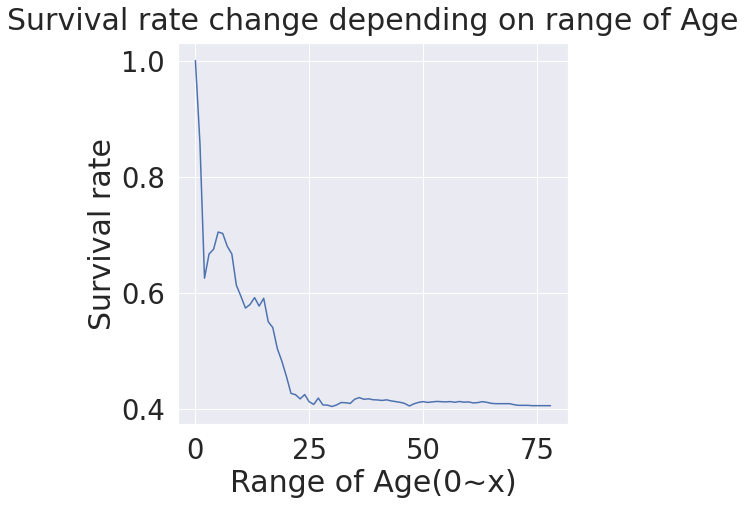

In [40]:
# 1살~80살까지 1살은 총몇명인데 몇명 살았고, 2살은 총몇명인데 그중에 몇명살았고 ...등
# y = 1.02는 제목의 위치를 살짝 조절해준것 (예쁘게 나오도록)

change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")
plt.show()

### 

### Pclass, Sex, Age

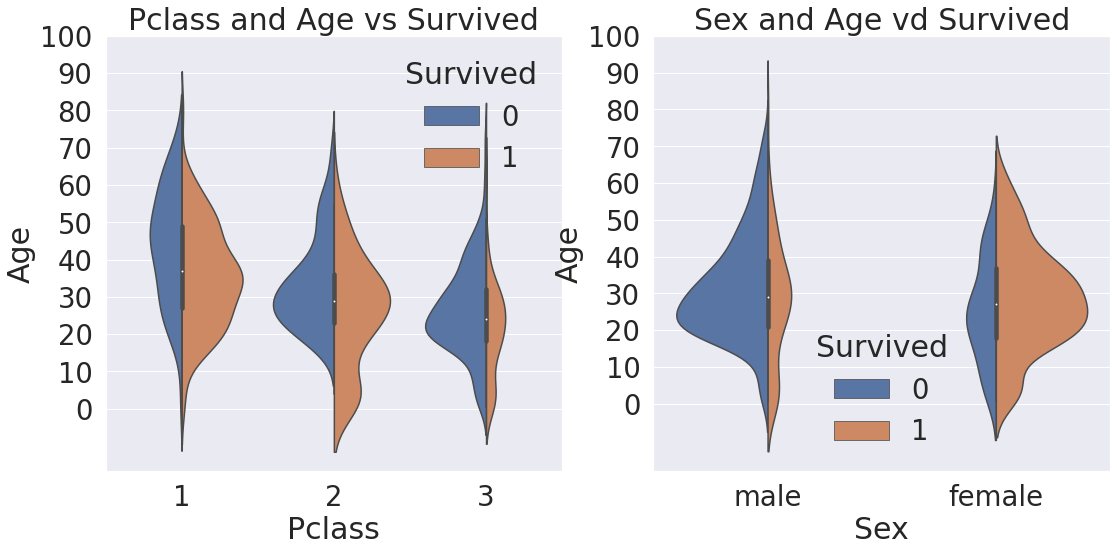

In [41]:
# split=True은 그래프를 겹쳐보여주는 것. 
# set_yticks y축 단위

f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vd Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Embarked

<AxesSubplot:xlabel='Embarked'>

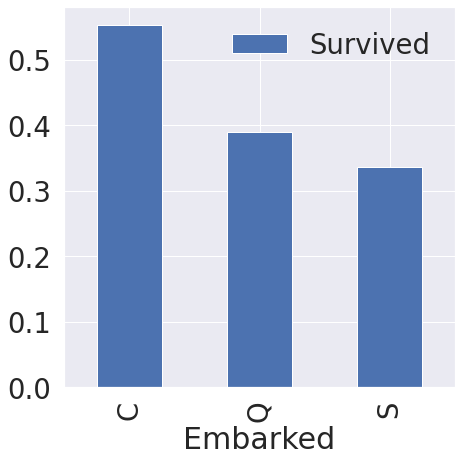

In [42]:
# 승선한 장소와 생존의 관계 파악

f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [43]:
# 판다스 데이터프레임, 시리즈를 정렬하고싶을때 사용법 1
# value에 대해서 sort 방법

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [44]:
# 판다스 데이터프레임, 시리즈를 정렬하고싶을때 사용법 2
# index에 대해서 sort하는 방법

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


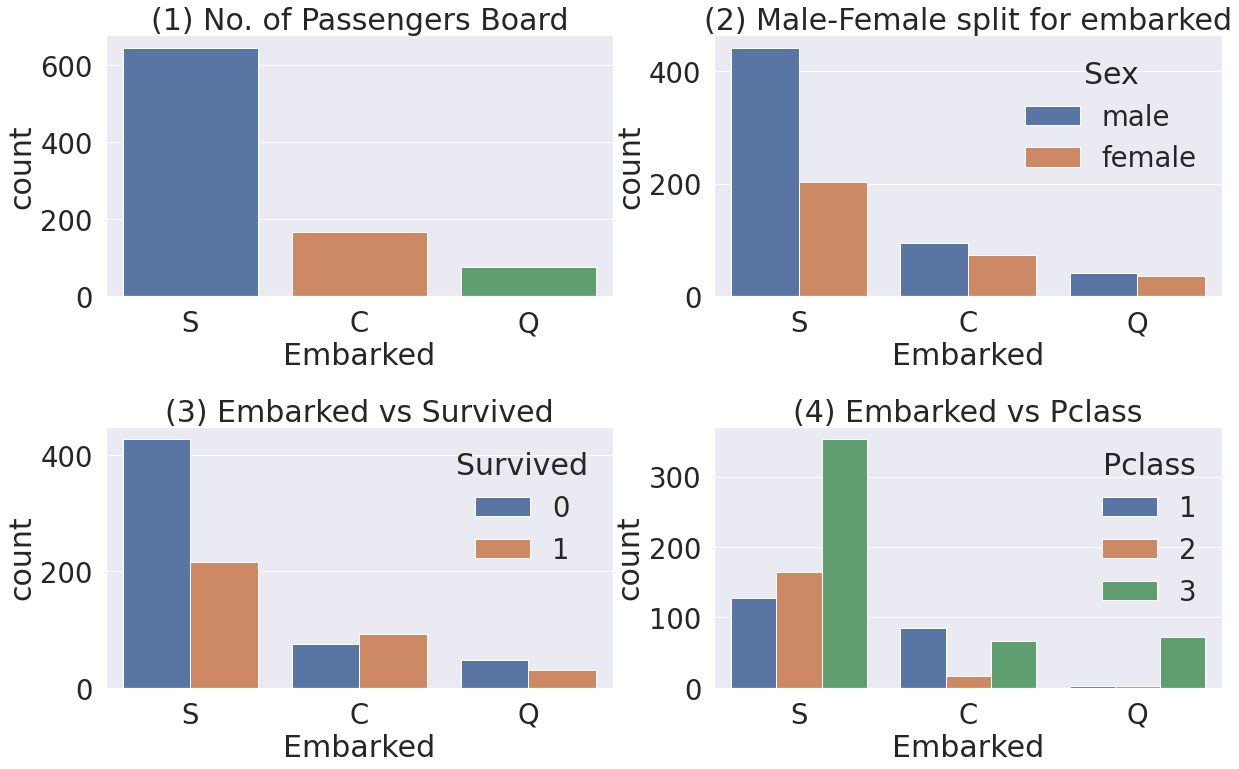

In [45]:
# plt.subplots_adjust(wspace=0.2, hspace=0.5)는 공백을 지정해주어 각 그래프사이에 간격 설정

f, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Board')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


### Family -> SibSp + Parch (가족= 형제자매+부모님,배우자,자녀)

In [46]:
# 자신도 포함되야 하므로 +1
# 그리고 train과 test에 모두 적용해야함

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [47]:
# 가족수가 가장 많은 것과 적은 경우를 확인

print('Maximum size of Family:', df_train['FamilySize'].max())
print('Minimum size of Family:', df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


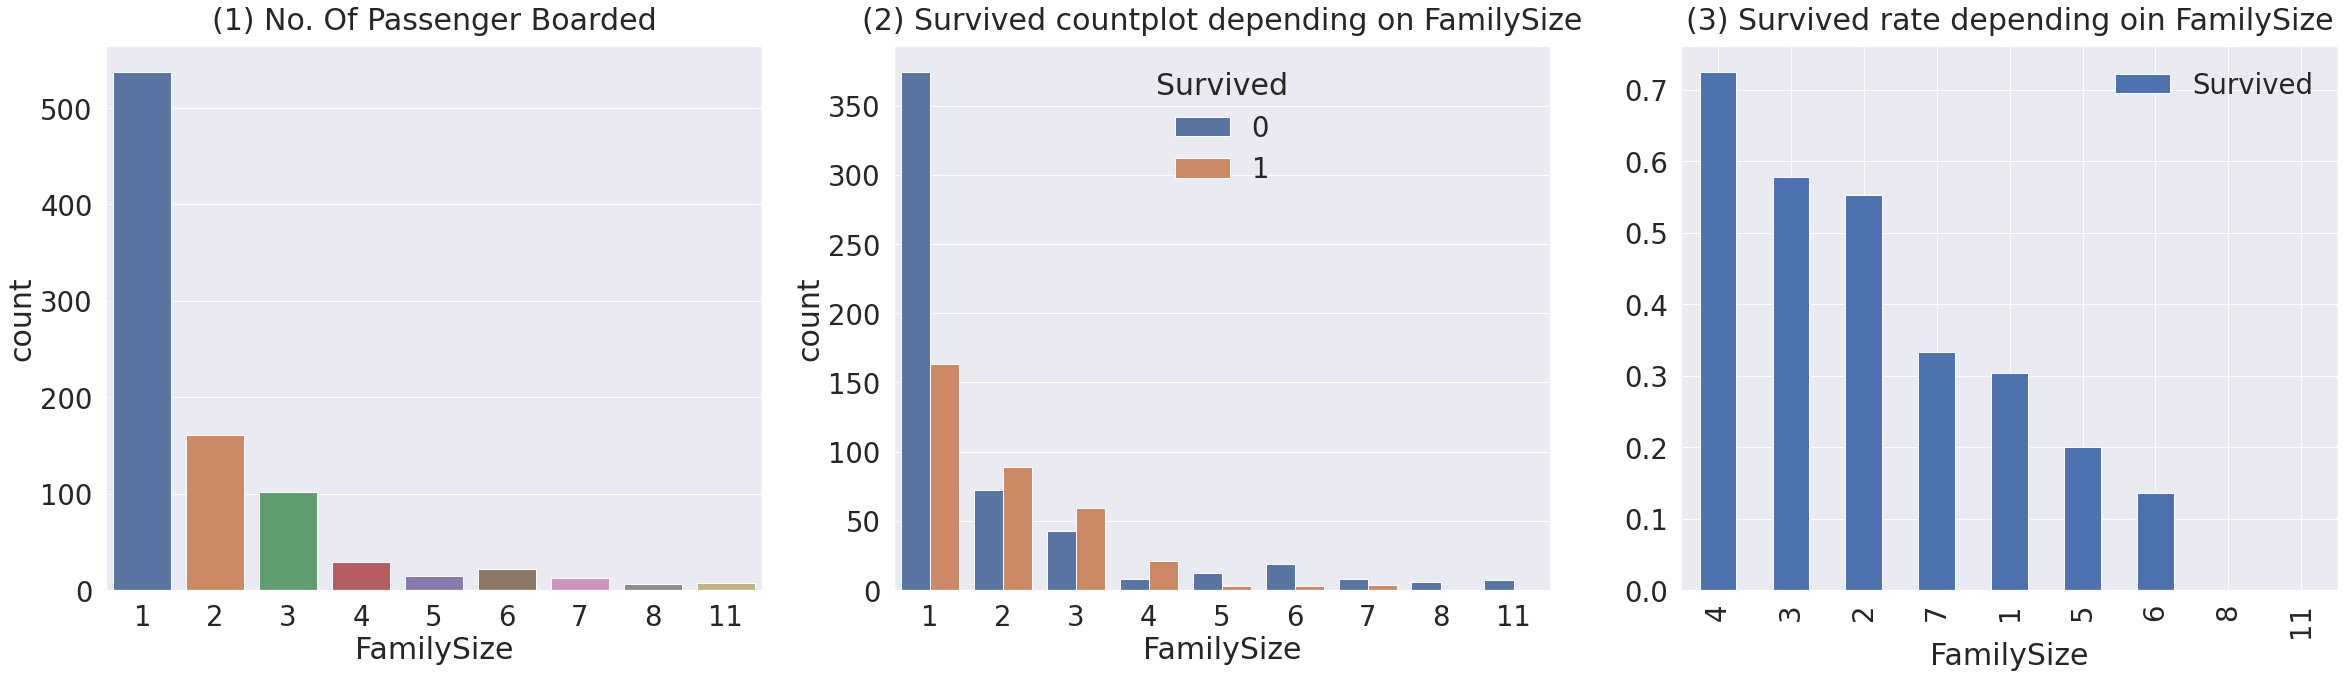

In [48]:
# 가족수와 생존 상관관계 확인

f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending oin FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Fare(continues feature임)

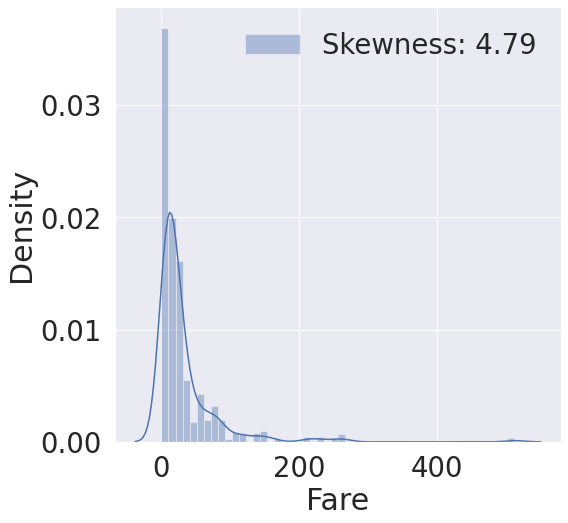

In [49]:
# distplot은 series를 받으면 히스토그램을 그려주는 plot
# Skewness는 왜도라고해서 그래프가 얼마나 쏠렷느냐를 알려주는 지표(분포의 비대칭성)-왜도의 기준은"0",첨도의 기준은"3"이지만 많은 통계프로그램에서는 "-3 shift"시켜서 기준값이 보통"0"이다.
# a = 0이면 정규분포, a > 0 이면 좌측으로 치우침, a < 0이면 우측으로 치우침
# g는 matplotlib의 객체가된다.
# g를 반납한다는 말은 결국 그림객체 하나를 넘겨준다는 것.
# 그림객체에 legend를 달겠다.

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [50]:
# 이대로 사용하면 머신러닝 학습하면 해당 feature의 특성을 잘 표현하지 못할 수도 있다.
# 따라서 작업을 해줘서 Skewness를 조금 없애줄 것이다.
# 로그를 취해준다.
# i > 0 이면 로그를 취하고, i < 0이면 0을 준다.
# 그것을 매핑한다.
# 특정 시리즈의 value들에 동일한 operation을 적용하고 싶을 떄는 map과 apply를 이용하면 되는데,
# apply 같은 경우에는 함수를 넣어주고,
# map 은 간단한 lamda함수나 딕셔너리를 넣어 줄 수 있다.

df_train["Fare"] = df_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [51]:
# 번외
# lamda함수를 이용한 것인데, 간단한 예시는 아래와 같다.
x = lambda i : i * i
x(2)

4

In [52]:
# 다시 본론

df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

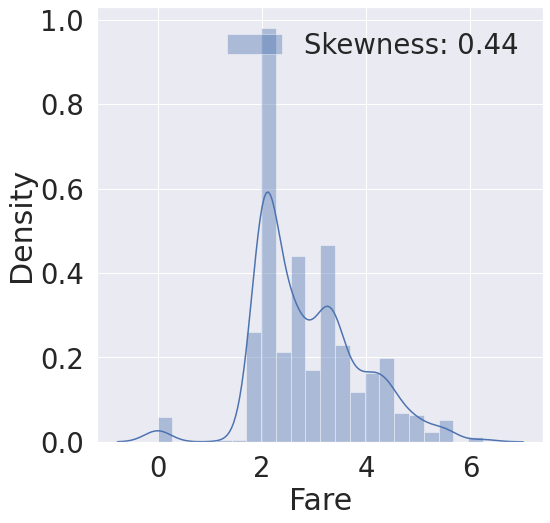

In [53]:
# Fare 피쳐를 lamda함수를 이용해서 로그를 취해서 매핑한 후 그래프 다시 출력
# distplot은 series를 받으면 히스토그램을 그려주는 plot
# Skewness는 왜도라고해서 그래프가 얼마나 쏠렷느냐를 알려주는 지표(분포의 비대칭성)-왜도의 기준은"0",첨도의 기준은"3"이지만 많은 통계프로그램에서는 "-3 shift"시켜서 기준값이 보통"0"이다.
# a = 0이면 정규분포, a > 0 이면 좌측으로 치우침, a < 0이면 우측으로 치우침
# g는 matplotlib의 객체가된다.
# g를 반납한다는 말은 결국 그림객체 하나를 넘겨준다는 것.
# 그림객체에 legend를 달겠다.

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### Cabin은 Null data가 80%가 넘기때문에 일단 제외시키고 넘어감
### Ticket 

In [54]:
df_train['Ticket'].value_counts()

1601        7
347082      7
CA. 2343    7
3101295     6
347088      6
           ..
364506      1
349210      1
349910      1
14313       1
349248      1
Name: Ticket, Length: 681, dtype: int64

In [55]:
# Ticket에 대한 idea를 생각해보고 Ticket feature를 이용해 보기를 권장함.

df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# Feature engineering

### Fill Null in Fare

In [56]:
# test 데이터에서 Fare의 null data는 1개

df_test['Fare'].isnull().sum()

1

In [57]:
# test data의 152번째

df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [58]:
# train data의 Fare 피쳐 평균값 확인

df_train['Fare'].mean()

2.893846237920027

In [59]:
# test data의 Fare 결측값을 train data의 Fare 평균값으로 대체

df_test['Fare'].fillna(2.9, inplace=True)

In [60]:
# test data 결측값 대치 확인

df_test.loc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          2.9
Cabin                         NaN
Embarked                        S
FamilySize                      1
Name: 152, dtype: object

### Fill Null in Age

In [61]:
# Age의 null data는 177개

df_train['Age'].isnull().sum()

177

In [62]:
# 승객들 호칭들을 가지고 그루핑 해볼 것이다.
# 호칭을 추출해야함
# .str을 붙히면  str type으로 바뀐다.
# 정규표현식을 이용할 것이다.
# str.extract()은 원하는 문자열을 추출할 때 이용
# A-Za-z은 대문자 A부터 Z까지, 그리고 소문자 a부터 z까지 하나의 캐릭터가 한개 이상이면 거기에 "."이 붙은 것을 extract하겠다 라는 뜻.
# ex) Mr, Miss 등
# train, test에 같이 적용할 것.
# dataframe에  Initial column을 생성

df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [63]:
# train dataframe column확인

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [64]:
# test dataframe column확인

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs


In [65]:
# 성별에 따라 어떻게 count되어있는 지 확인

pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [66]:
# Mr, Mrs, Miss 그리고 다른것들로 그루핑 
# inplace=True를 하면 바로 적용이 됌. df_train['Initial'] = df_train['Initial'].replace... 안해도댐


df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)


In [67]:
# df_train 적용 확인

df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [68]:
# df_test 적용 확인

df_test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [69]:
# df_train을 Initail 기준으로 각종 평균값 확인

df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

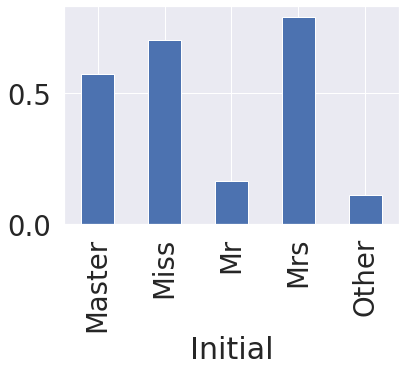

In [70]:
# df_train을 Initial 기준으로 Survived의 값을 플랏으로 확인

df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [71]:
# 두개의 dataframe을 합치는 메소드는 concat, merge 등이 있다.
# df_train 와 df_test 를 합친다.

df_all = pd.concat([df_train, df_test])

In [72]:
# 합쳐진 dataframe확인
# 891 + 418 = row 1309 
# 인덱스도 그대로 가져옴 
# 그러니까 1~891 + 1~419 인 상태임
# 만약 인덱스를 1309로 합치고싶으면(0~1308)이 되게 하는 방법은 df_all.reset_index() 
# 다시 돌아가고싶으면 df_all.reset_index(drop=True) 

df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,3,Mr


In [73]:
# Initial로 그룹핑해서 나온 나이의 평균을 이용해서 null값을 채워 줄 것이다.

df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,3.754098
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.124528
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,9.994727,1.608301
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.356784
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.538462


In [74]:
# df_train에 Age가 null인 것들 반환

df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [75]:
# df_train에서 Age가 null이면서 Initial이 Mr인 것 반환

df_train['Age'].isnull() & (df_train['Initial'] == 'Mr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [76]:
# loc를 이용해서 df_train에서 Age가 null이면서 Initial이 Mr인 것 인덱싱 

df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,3.391147,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr


In [77]:
# loc를 이용해서 df_train에서 Age가 null이면서 Initial이 Mr인 것 인덱싱 하고 컬럼을 지정해주면 해당 컬럼만 추출

df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'),'Age')]

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [78]:
# loc를 이용해서 df_train에서 Age가 null이면서 Initial이 Mr인 것 인덱싱 하고 컬럼을 지정해주면 해당 컬럼만 추출
# 그리고 "="을 이용해서 숫자를 지정해주면 나이 null값에 33이 다 들어감
# 33을 지정한 이유는 Mr의 평균 나이가 32.5이기 반올림해서 33을 넣음
# 같은 방식으로 모든 initial에 적용

df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'),'Age')] = 33
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Master'),'Age')] = 5
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Miss'),'Age')] = 22
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Mrs'),'Age')] = 37
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial'] == 'Other'),'Age')] = 45

# test data에도 똑같이 해줘야함.
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial'] == 'Mr'),'Age')] = 33
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial'] == 'Master'),'Age')] = 5
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial'] == 'Miss'),'Age')] = 22
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial'] == 'Mrs'),'Age')] = 37
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial'] == 'Other'),'Age')] = 45


In [79]:
# 해당 null값에 33이 들어간 것을 확인
# 모든 initial도 적용되었을 것임.

df_train.loc[(df_train['Initial'] == 'Mr'), 'Age']

0      22.0
4      35.0
5      33.0
6      54.0
12     20.0
       ... 
881    33.0
883    28.0
884    25.0
889    26.0
890    32.0
Name: Age, Length: 529, dtype: float64

In [80]:
# df_train에  원하는 대로 다채워져셔 null 이 없는지 확인

df_train['Age'].isnull().sum()

0

In [81]:
# df_test에  원하는 대로 다채워져셔 null 이 없는지 확인

df_test['Age'].isnull().sum()

0

### Fill Null in Embarked and categorize Age

In [82]:
# Embarked의 null 데이터 갯수 확인

df_train['Embarked'].isnull().sum()

2

In [83]:
# 총 데이터가 891개로 꽤 많기 때문에 결측값 2개는 가장 많이 나온 데이터로 채워줄 것이다

df_train.shape

(891, 14)

In [84]:
# S가 가장 많았기 때문에 'S'로 치환

df_train['Embarked'].fillna('S', inplace=True)

In [85]:
# 치환 후 Embarked의 null 데이터 갯수 확인

df_train['Embarked'].isnull().sum()

0

### continues feature를 category로 만드는 방법
1,2,3,4,5,6등이 -> 1~3까지는 1 그리고 4~6까지는 4 등으로 바꾸는 것
자칫 정보 손실이 일어날 수 있지만, 어떠한 상황에서는 더 잘맞을 수도 있다.

In [86]:
# dataframe에 Age 카테고리 컬럼을 하나 생성

df_train['Age_cat'] = 0

In [87]:
# dataframe에 생성된 column확인

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [88]:
# 하드코딩하여 df_train의 'Age'의 범위를 나누어 Age_cat에 값 생성하는 방법

df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [89]:
# 하드코딩하여 df_test 'Age'의 범위를 나누어 Age_cat에 값 생성하는 방법

df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [90]:
# df_train의 Age_cat 확인

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [91]:
# df_test의 Age_cat 확인


df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,2.0


In [92]:
# 위 의 예처럼 하드코딩하여 해줄 수 있지만, 함수를 이용하면 좀더 쉽게 가능하다.
# apply라는 메서드를 사용해 보자.
# 함수를 생성한다. 

def category_age(x):
    if x < 10:
        return 0 
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [93]:
# apply 메서드를 이용해서 함수 적용
# 위에서 하드코딩한 방법이랑 결과를 비교하기위해 Age_cat_2라고 지정

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [94]:
# 두 방법 결과 비교
# .all()은 모든게 True이어야 True반환, 1개라도 Flase면 False반환
# .any()는 하나라도 True면 True반환
# 즉 전체가 같은지 확인하려면 .all()

(df_train['Age_cat'] == df_train['Age_cat_2']).all()

# 두 방법은 결과가 같으니 좀더 편리한 함수, apply를 이용하는 습관을 들이자.

True

In [95]:
# 카테고리로 만들었으니까 train의 Age, Age_cat_2는 drop해야함.
# test에는 Age_cat_2는 실행안했으니까 'Age' 만 drop해주면 됌.
# axis = 1을 해줘야하는 이유는 세로 column을 drop하는 것이기 때문.
# inplace = True를 해주어야 실제로 적용됌.

df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)
df_test.drop(['Age'], axis = 1, inplace = True)

### Change string to categorical and Pearson coefficeint
스트링 데이터를 수치데이터로 바꾸기

In [96]:
# Initial에 어떤 카테고리가 있는지 확인

df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [97]:
# df_train와 df_tetst의 Initial column에 .map()을 이용해서 카테고리데이터를 숫자로 치환

df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [98]:
# 치환됐는지 확인

df_train['Initial']

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Initial, Length: 891, dtype: int64

In [99]:
# Embarked 의 unique확인
# 이렇게 쓰면 array type으로 보여줌

df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [100]:
# 이렇게 쓰면 Series type으로 보여줌

df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
# # df_train와 df_tetst의 Embarked column에 .map()을 이용해서 카테고리데이터를 숫자로 치환

df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [102]:
# 데이터 치환이 잘 되었는지 확인

df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,2.564949,NaN,2,1,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,3.401197,B42,2,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,3.154870,NaN,2,4,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,3.401197,C148,0,1,2,2


In [103]:
#null data가 있나 확인.

df_train.Embarked.isnull().sum()

0

In [104]:
# Sex 피쳐도 여자 0, 남자 1로 치환
# df_train, df_test 모두 적용

df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [105]:
# train sex치환 확인

df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,1,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,2


In [106]:
# test sex 치환 확인

df_test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,1,2,2,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,2,2,3,4.0
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,1,1,2,6.0
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,2,2,2,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,2,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0,0,A.5. 3236,8.0500,NaN,2,1,2,3.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0,0,PC 17758,108.9000,C105,0,1,2,3.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,1,2,3.0
416,1308,3,"Ware, Mr. Frederick",1,0,0,359309,8.0500,NaN,2,3,2,3.0


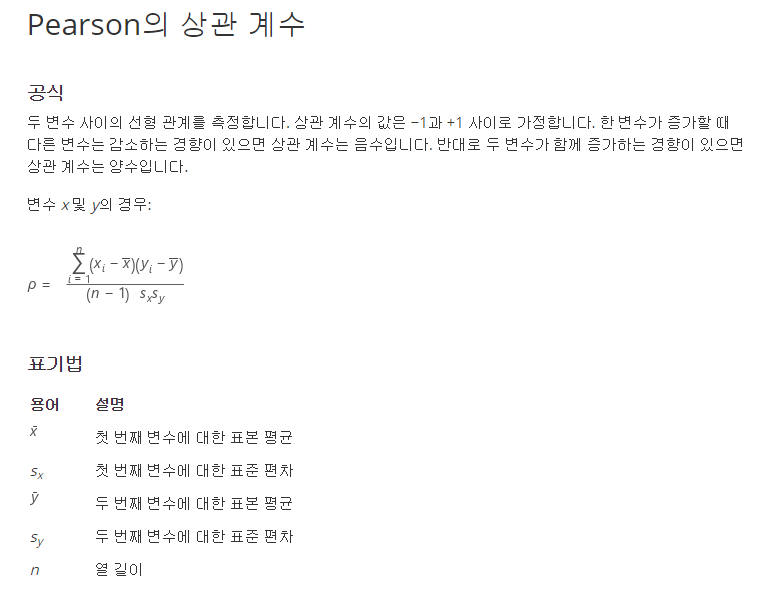
### 각 피쳐들간의 상관관계를 파악할 때 이용

In [107]:
#heatmap을 그릴 것인데 그전에 8개의 피쳐를 지정해준다.
#  8 by 8로 그릴것이다.

heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

In [108]:
# 피어슨 상관계수를 이용해서 correalation(상관관계)를 구하는 방법은
# .corr() 이다.

heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

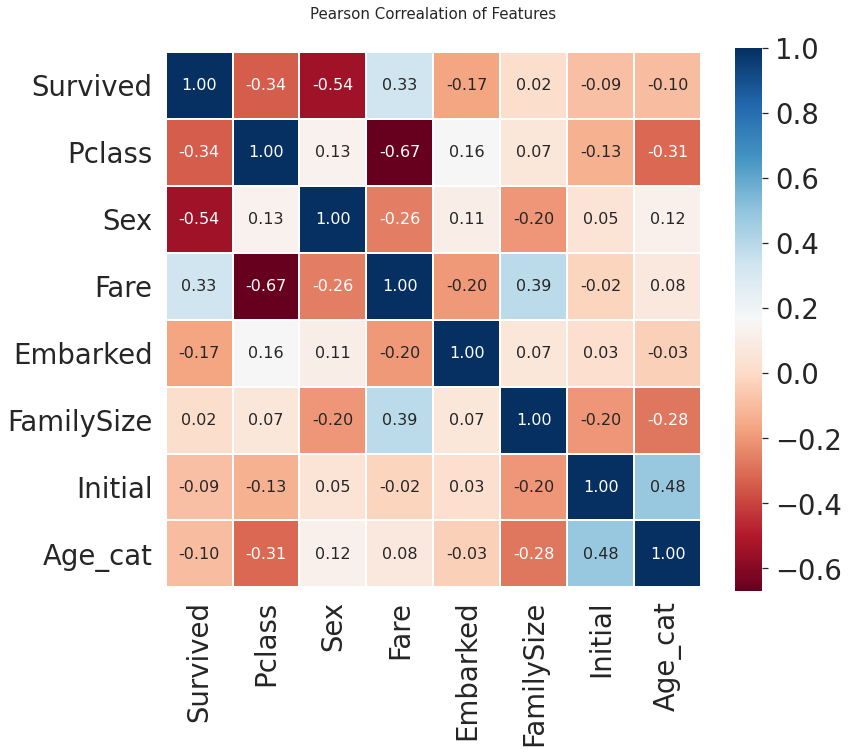

In [109]:
# 이제 히트맵을 그린다.
# linewidths=0.1는 칸사이에 라인의 간격설정
# vmax=1.0 색깔 변환의 기준
# linecolor='white' 칸사이 라인의 색상
# annot=True 칸에 숫자 표시
# annot_kws={'size':16}는 칸에 숫자글씨 사이즈
# fmt='.2f'숫자 반올림

colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

### One-hot encoding on the Initial and Embarked

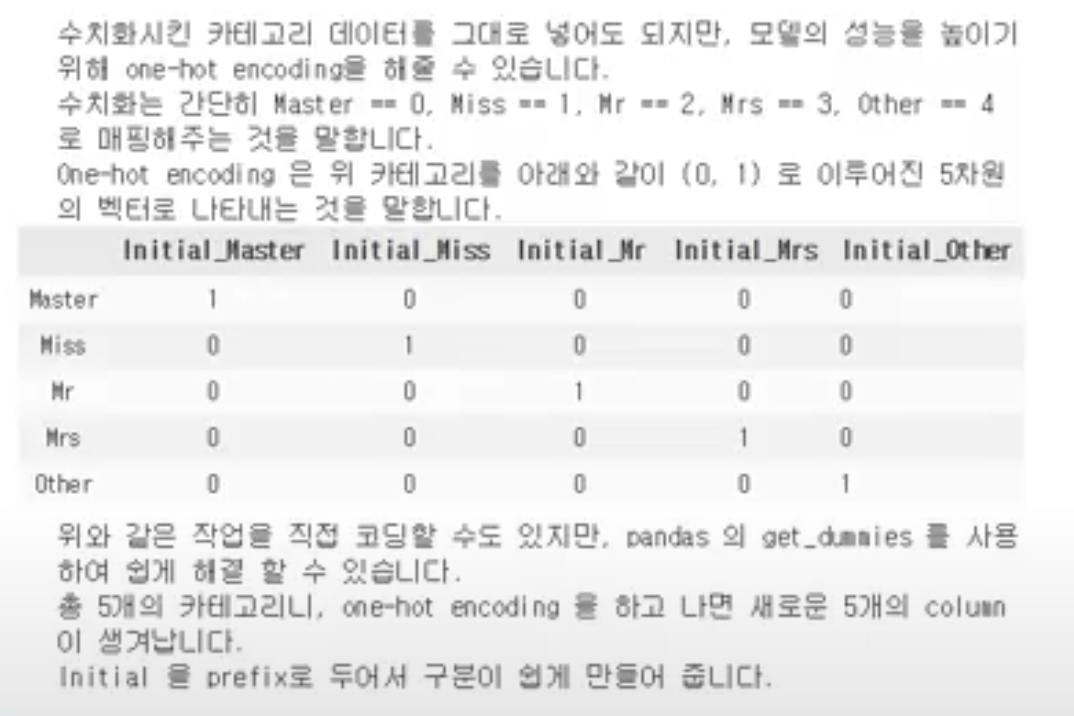

그냥 수치로 치환한것을 모델에 이용해도 되지만,
원핫인코딩은 카테고리 데이터를 정말 카테고리답게 쓰는 방법(?)이라고 생각

In [110]:
# df_train 확인

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [111]:
# Initial을 원핫 인코딩

# pd.get_dummies() 라는 함수는 원핫인코딩을 만드는 함수
# columns=['Initial']은 원핫 인코딩을 할 컬럼
# prefix='Initial'은 column별 prefix를 지정해주는 것(이름_n)
# 기존 Initial column은 없어짐.

# train, test 모두 적용

df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [112]:
# Embarked을 원핫 인코딩

# pd.get_dummies() 라는 함수는 원핫인코딩을 만드는 함수
# columns=['Embarked']은 원핫 인코딩을 할 컬럼
# prefix='Embarked'은 column별 prefix를 지정해주는 것(이름_n)
# 기존 Embarked column은 없어짐.

# train, test 모두 적용

df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [113]:
# 필요없는 column은 날릴 것이다.
# trian, test 모두 적용
# axis = 1는 세로열을 제거한다는 뜻

df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)


In [114]:
# train 데이터프레임에 사용할 feature만 남았는지 확인

df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [115]:
# test 데이터프레임에 사용할 feature만 남았는지 확인


df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,2,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6.0,0,0,1,0,0,0,1,0
3,3,1,8.6625,2,2.0,0,0,1,0,0,0,0,1
4,3,0,12.2875,1,2.0,0,0,0,1,0,0,0,1


#  Model development - Machine learning(Randomforest)

In [116]:
# RandomForestClssifier는 우리가 풀어야할 문제가 이진 분류 문제이기 때문에 사용
# 즉 Binary classification 문제에 사용할 것이다.
# metrics는 모델을 평가하는 여러 함수들을 제공
# train_test_split 모델 검증을 할 때 train set을 train과 valid로 분할 할때 사용

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [117]:
# 사용할 데이터 지정

X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [118]:
# train data를 train 과 valid로 스플릿 

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=1)

In [119]:
# RandomForestClssifier 모델 생성 및 모델 fit

model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [120]:
# 모델 예측

prediction = model.predict(X_vld)

In [121]:
# 예측확인

prediction

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [122]:
# 정확도 점수 확인

print('총 {}명에 대해서 {:.2f}% 정확도로 생존 여부 예측성공'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명에 대해서 76.12% 정확도로 생존 여부 예측성공


In [123]:
# 수작업으로 확인하는 방법도 있다.

(prediction == y_vld).sum() / prediction.shape[0]

0.7611940298507462

# Machine learning prediction - feature importance and prediction on test set
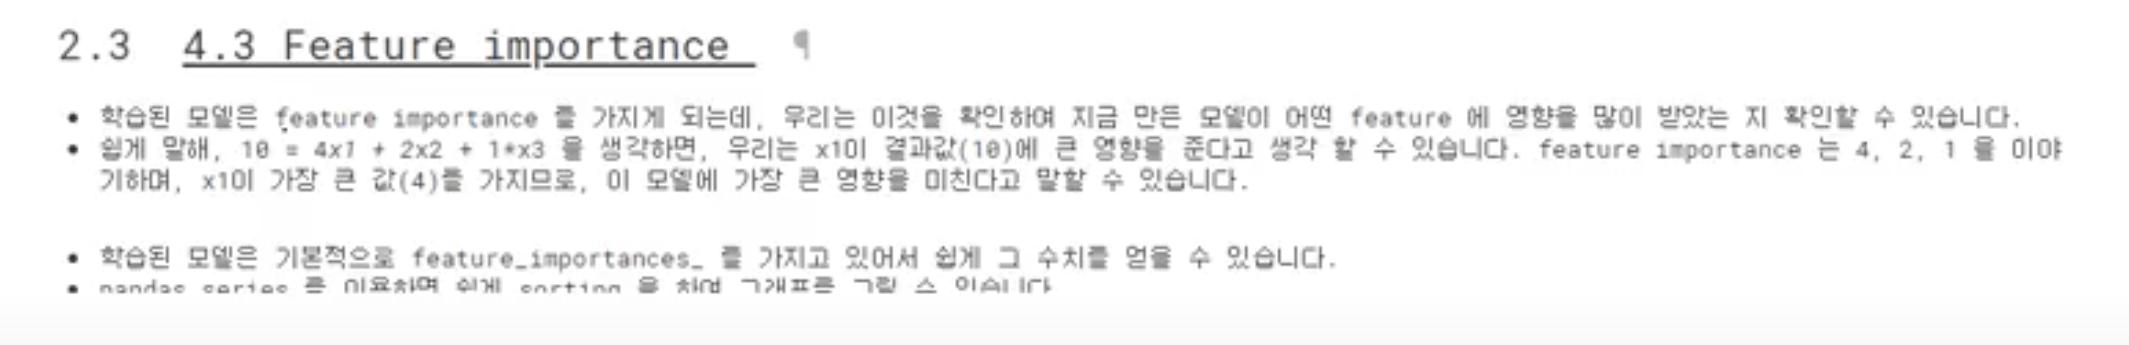

In [124]:
# 판다스 시리즈 임포트

from pandas import Series

In [125]:
# scikitlearn에서는 모델을 학습시키게되면 피쳐임포턴스를 항상 가지고있다.

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

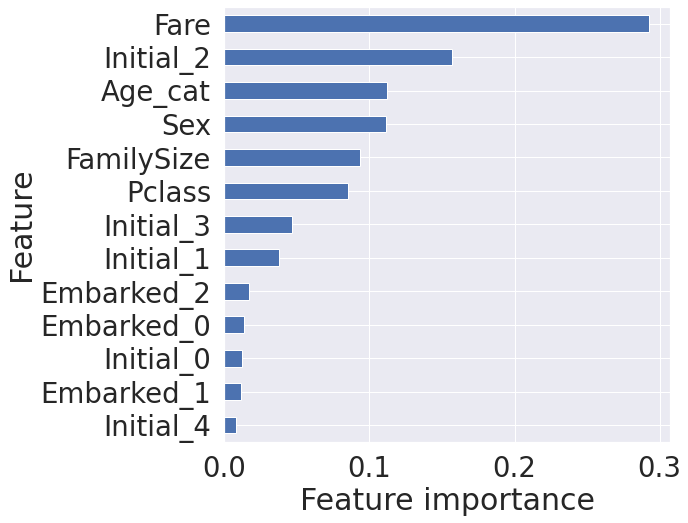

In [126]:
# 피쳐 임포턴스를 플랏으로 보자.

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [127]:
# 이제 test data를 가지고 예측해보자.

prediction = model.predict(X_test)

In [128]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [129]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [130]:
# 서브미션 생성 
submission['Survived'] = prediction
submission.to_csv('./first_submission.csv', index=False)